In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("C:/Users/asus/Downloads/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


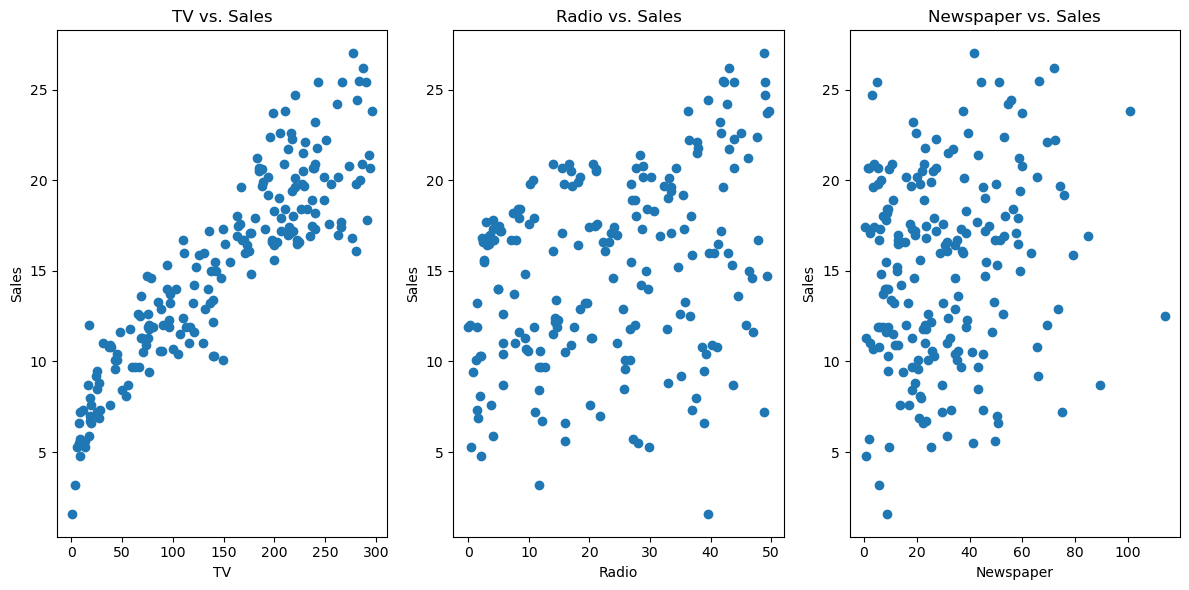

In [8]:
plt.figure(figsize=(12, 6))

# Scatter plot for TV vs. Sales
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'])
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# Scatter plot for Radio vs. Sales
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs. Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs. Sales
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs. Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [9]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])  

In [14]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred1 = regressor.predict(X_test)

In [26]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 1.2748262109549335
Mean Squared Error: 2.907756910271089
Root Mean Squared Error: 1.7052146229349223


In [27]:
from sklearn.metrics import r2_score

score = r2_score(y_pred1,y_test)
score

0.896026527496257

# Decision Tree model

In [23]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=5)   # For Post Pruning - we use max_depth hyperparameters
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [28]:
y_pred2 = regressor.predict(X_test)

In [29]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 1.2748262109549335
Mean Squared Error: 2.907756910271089
Root Mean Squared Error: 1.7052146229349223


In [30]:
score = r2_score(y_pred2,y_test)
score

0.896026527496257

# XGBoost Regression

In [32]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.1 MB/s eta 0:00:00


In [33]:
import xgboost as xg 

In [35]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 

xgb_r.fit(X_train, y_train)  

C:\Users\asus\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [36]:
y_pred3 = xgb_r.predict(X_test) 

In [38]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 0.9427864217758177
Mean Squared Error: 1.5015138672239683
Root Mean Squared Error: 1.2253627492395744


In [39]:
score = r2_score(y_pred3,y_test)
score

0.9508423803145541